# Matrix Determinant

This text and code is derived from Mike X Cohen's course on linear algebra. For more information, see https://www.udemy.com/linear-algebra-theory-and-implementation/?couponCode=LINALGPX7

## 1. Key Concepts

* Notation: $\det(A)$, ${\begin{vmatrix}
a&b\\
c&d\\
\end{vmatrix}} $, $|A|$  
* Determinant is defined only for the square matrices!  
* Determinant is a scalar that reflects the entire matrix  
* If $det(A) = 0$, then the matrix is singular, non-invertible. **NOTE**: it's almost never used in practice. 

## 2. Determinant Applications

**Geometry**: In geometry the determinant defines area/volume of the shape specified by coordinates in the matrix. For example, for the line the result will be 0. 

**Matrix Inverse**: When computing the inverse, as one of the steps, we need to calculate the determinant and then divide each element by it. 

## 3. Practical Issues
Determinant should not be used to determine if the matrix is singular due to innacuracy. This can be illustrated by an example. 

Here is a *perfect* case, when we can actually compute the determinant by hand. The columns (as well as the rows) are linearly dependent, so the rank is 1 and we expect the determinant to be 0. 

In [1]:
import numpy as np
A = [[1,1],[2,2]]
np.linalg.det(A)

0.0

However, if we increase the number of dimensions, the determinant will be... not even close to zero. Here is an example:

In [7]:
# set the seed so that the result is reproducible
np.random.seed(1)
# generate a random 20x20 matrix
C = np.random.randint(10,size=(20,20))
# make the second column equal to the third so that we 
# have linear dependence (so the determinant should be 0 in theory)
C[:,1] = C[:,2]
np.linalg.det(C)

21.720780050749045

The moral of the story is that in real life (when we have far more than 2 dimensions in the data) we should never use the determinant to judge about the matrix singularity. 

## 4. Determinant of a 2x2 Matrix

$$det(A) = {\begin{vmatrix}
a&b\\
c&d\\
\end{vmatrix}} = ad - bc$$

## 5. Determinant of a 3x3 Matrix

General rule: Sum the product of 3 right diagonals minus the sum of products of 3 left diagonals. When constructing the diagonals, imagine that they 'wrap' around, so each diagonal has 3 elements: 

$${\begin{vmatrix}
a&b&c\\
d&e&f\\
g&h&i\\
\end{vmatrix}} = (aei + bfg + cdg) - (ceg + bdi + afh) $$

**NOTE** This procedure will **NOT** work for matrices of any other size. 

## 6. Determinant of a shifted matrix (Regularization)

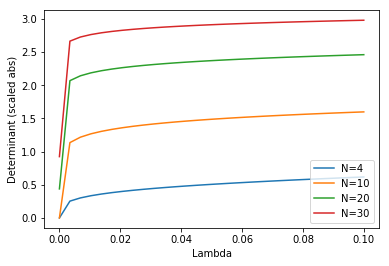

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

lambdas = np.linspace(0,0.1,30)

def simulate(N, n_sims, lambdas):    
    all_dets = np.empty(shape=(0,len(lambdas)))
    for i in range(n_sims):
        A = np.random.randn(N,N)
        A[:,1] = A[:,2]        
        dets = np.array([])
        for l in lambdas:
            C = A + l*np.eye(N)
            det = abs(np.round(np.linalg.det(C),8))
            dets = np.append(dets,det)
        all_dets = np.vstack([all_dets, dets])
    det_means =  all_dets.mean(axis=0)
    return det_means

for i in [4,10,20,30]:
    y = simulate(N = i, n_sims = 3, lambdas = np.linspace(0,0.1,30))
    plt.plot(np.linspace(0,0.1,30),y**(1/i), label="N="+str(i))
plt.xlabel("Lambda")
plt.ylabel("Determinant (scaled abs)")
plt.legend()
plt.show()